In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

### load datasets 

In [2]:
import pandas as pd

In [4]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [7]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

### 단일변수

### 단일 변수 확인

In [8]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [11]:
df_TOCC.describe(include=object).columns

Index(['type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'payment_type', 'product', 'state', 'overdue', 'bank', 'cancellation'],
      dtype='object')

#### 단일변수의 범주형
- 주로 object (문자) = 항목 일때 사용함. 

In [12]:
df_TOCC['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

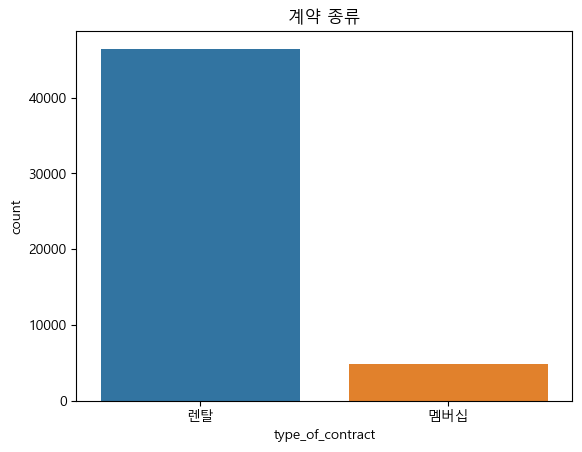

In [15]:
sns.countplot(data=df_TOCC, x='type_of_contract')
plt.title('계약 종류')
plt.show()

In [16]:
df_TOCC['type_of_contract2'].value_counts()

Promotion           15811
Normal              15324
Package             10184
Extension_Rental     4975
TAS                  2627
TA2                  2087
Group                 190
TA3                    92
TA1                    13
Name: type_of_contract2, dtype: int64

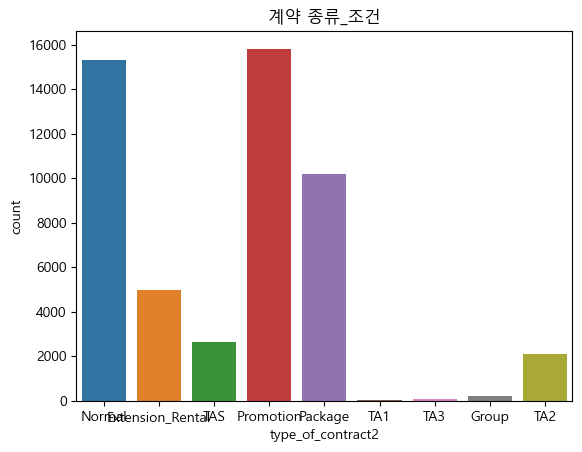

In [18]:
sns.countplot(data=df_TOCC, x='type_of_contract2')
plt.title('계약 종류_조건')
plt.show()

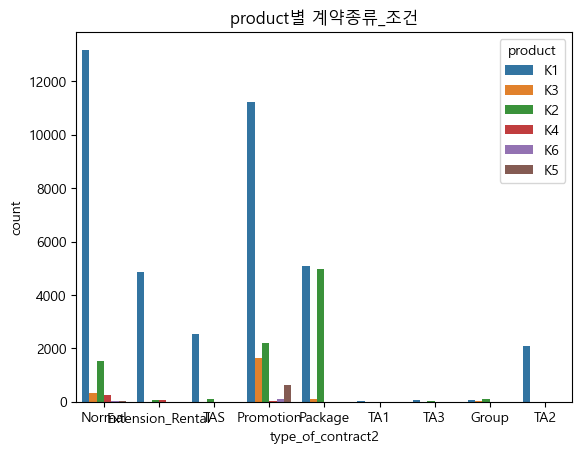

In [20]:
sns.countplot(data=df_TOCC, x='type_of_contract2', hue='product')
plt.title('product별 계약종류_조건')
plt.show()

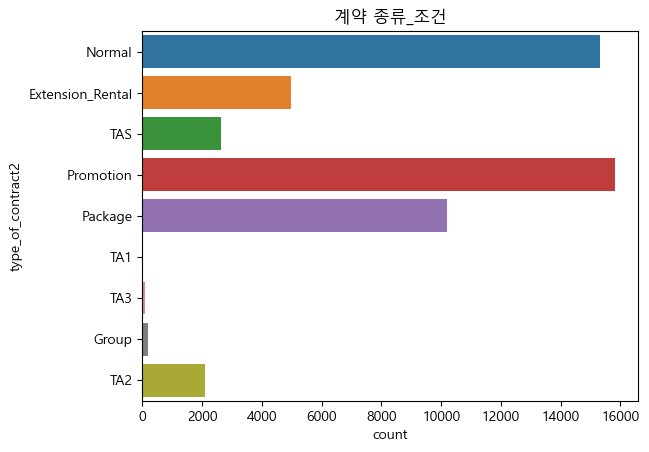

In [21]:
sns.countplot(data=df_TOCC, y='type_of_contract2')
plt.title('계약 종류_조건')
plt.show()

In [22]:
df_TOCC['bank'].value_counts()

국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
NH농협카드          4
한국투자증권          4
신한금융투자          4
우리카드            3
대우증권            2
하이투자증권          1
메리츠종합금융증권       1
수협카드            1
상호저축은행          1
SK증권            1
하나대투증권          1
산림조합중앙회         1
대신증권            1
씨티카드            1
Name: bank, dtype: int64

In [30]:
## 거래 은행 중 상위  7위 까지 확인
## bank column → 항목 serizes(.value_counts())→ index 추출(.index) →list 변환 (.to_list()) → slicing 7개 ([:7])
order_list = df_TOCC['bank'].value_counts().index.to_list() [:7]
order_list

['국민은행', '롯데카드', '농협은행', '신한은행', '우리은행', '기업은행', '신한카드']

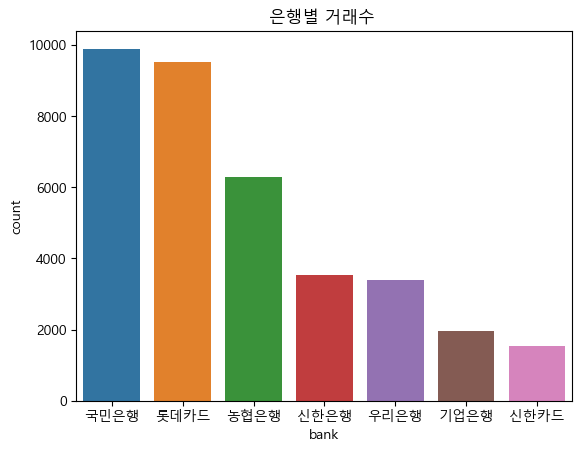

In [31]:
# sns.countplot(data=df_TOCC, x='bank', order=['국민은행','롯데카드','BC카드'])
sns.countplot(data=df_TOCC, x='bank', order=order_list)
plt.title('은행별 거래수 ')
plt.show()

#### 연속형
- 범주형 아닌 것. 

In [32]:
df_TOCC.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


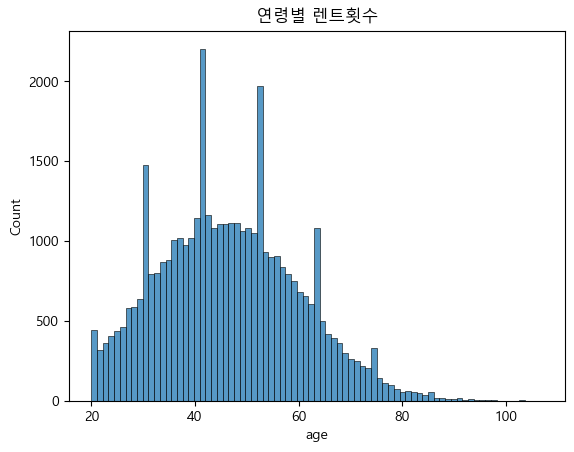

In [34]:
sns.histplot(data=df_TOCC, x='age')
plt.title('연령별 렌트횟수')
plt.show()

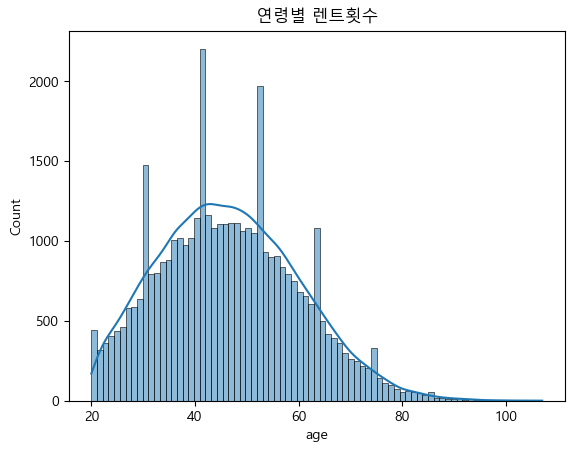

In [35]:
sns.histplot(data=df_TOCC, x='age', kde=True)
plt.title('연령별 렌트횟수')
plt.show()

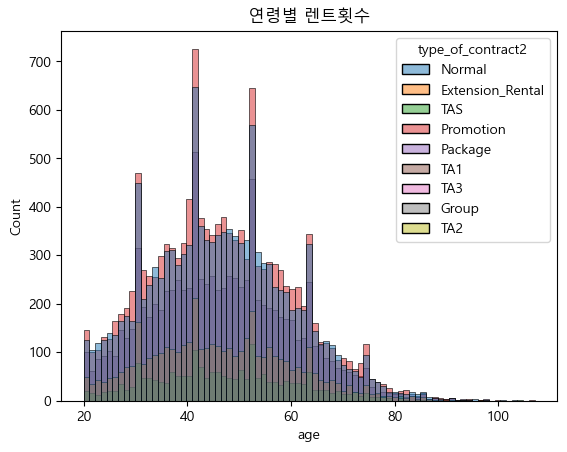

In [37]:
sns.histplot(data=df_TOCC, x='age', hue='type_of_contract2')
plt.title('연령별 렌트횟수')
plt.show()

<Axes: xlabel='age'>

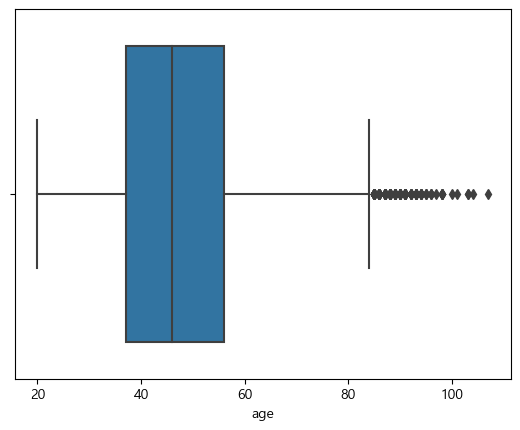

In [38]:
sns.boxplot(data=df_TOCC, x='age')

In [39]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

### 8월 14일

### 다변수

#### X (설명변수) / Y (목표변수) = 범주형 / 연속형
     - channel_ object/ amount _int

In [5]:
df_TOCC.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

In [7]:
df_TOCC['amount'].describe()

count     51304.000000
mean      93994.980021
std       15305.147334
min       54603.000000
25%       81900.000000
50%       96900.000000
75%       98400.000000
max      215700.000000
Name: amount, dtype: float64

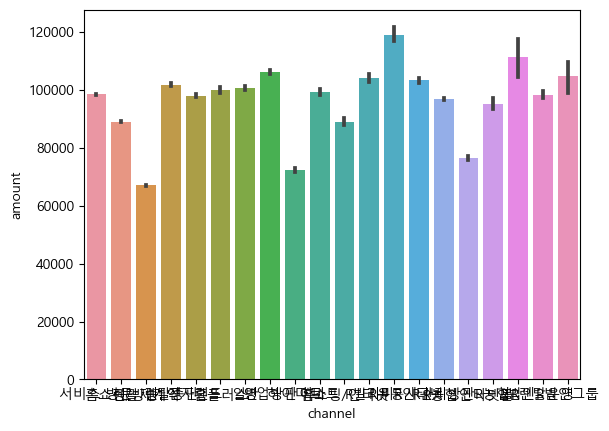

In [9]:
sns.barplot(data=df_TOCC, x='channel', y='amount') ## 기본 평균 값이 나옴
plt.show() 
## confidence interval _ 유의 범위인데 구지 안쓰고 STR 씀

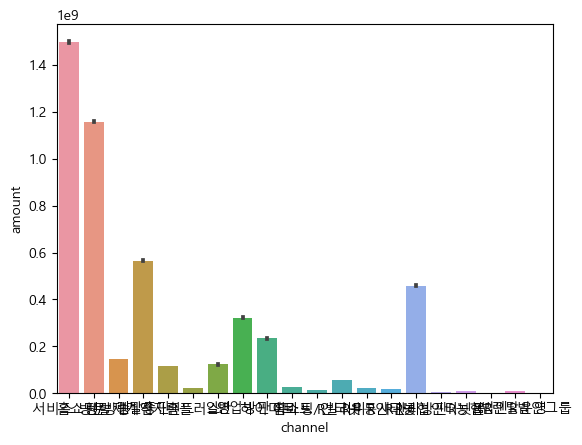

In [10]:
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator = sum ) ## 기본 총합 = np.sum 비슷
plt.show()

In [15]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
df_TOCC_sum.sort_values(by='amount', ascending=False)

,amount
channel,
서비스 방문,1496420760
홈쇼핑/방송,1156173900
렌탈총판,565189800
R관리방판,458556039
영업방판,322955100
하이마트,234002706
렌탈재계약,147318600
일반,124029000
전자랜드,118252200


In [16]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:]

,amount
channel,
R인터넷,20479800
홈쇼핑/인터넷,15777300
R렌탈운영,11808300
R농협,11337960
R농협인터넷몰,6350700
R법인,2114700
R법인그룹,2099400


In [18]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
(df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:].index)

Index(['R인터넷', '홈쇼핑/인터넷', 'R렌탈운영', 'R농협', 'R농협인터넷몰', 'R법인', 'R법인그룹'], dtype='object', name='channel')

In [22]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
df_TOCC_bottom_list= df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[-7:].index.to_list()

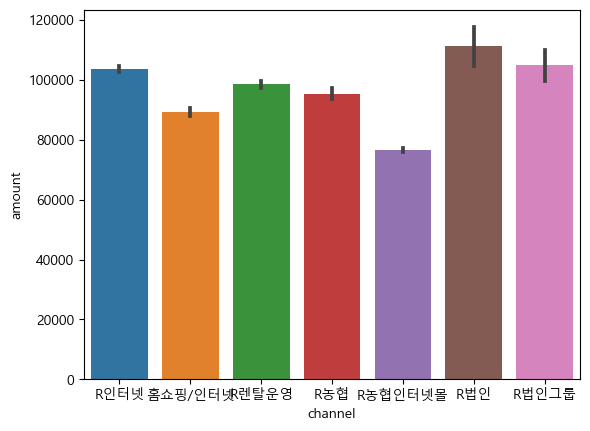

In [25]:
## amount 기준 하위 7개 순위 channel 표시
sns.barplot(data=df_TOCC, x='channel', y='amount',order = df_TOCC_bottom_list)
plt.show()

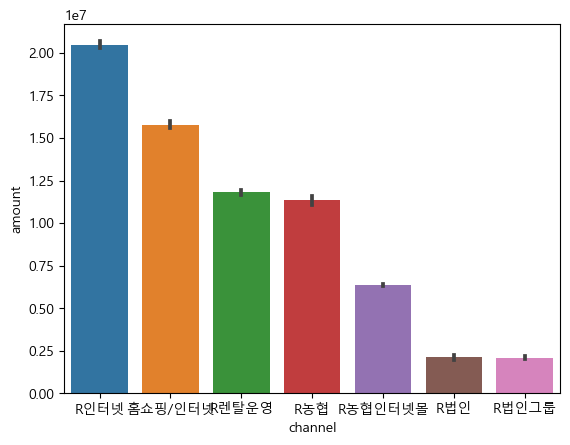

In [26]:
## 총 amount 기준 하위 7개 순위 channel 표시
sns.barplot(data=df_TOCC, x='channel', y='amount',estimator=sum, order = df_TOCC_bottom_list)
plt.show()

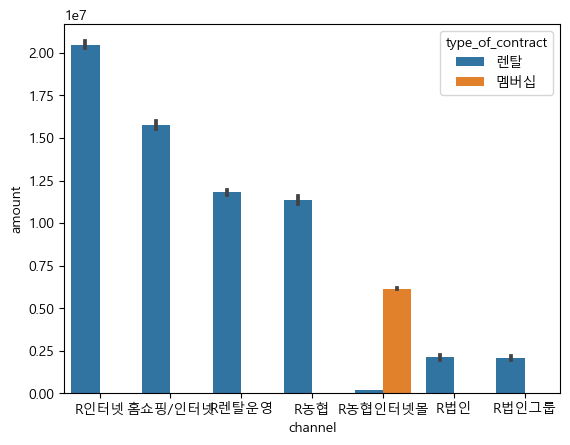

In [28]:
## 계약 조건으로 비교해볼때 
sns.barplot(data=df_TOCC, x='channel', y='amount',estimator=sum, order = df_TOCC_bottom_list, hue='type_of_contract')
plt.show()

#### 계약 조건으로 비교해볼때 
sns.barplot(data=df_TOCC, x='channel', y='amount',estimator=sum, order = df_TOCC_bottom_list, hue='type_of_contract')
    - 렌탈: 신규
    - R농협 인터넷몰에선 멤버십의 크기가 높은걸로 보아 재계약자가 많았다. 
    - R 인터넷, 홈쇼핑/인터넷에서 신규로 들어오는 사람들이 많다
    - 농협인터넷몰에서 재계약자가 많은 이유는? 협동조합 사람들이 많이 이용하는 것으로 보여짐. 농협구성원들임.       여기는 충성고객이 많은 편이다. 

Boxplot

In [34]:
df_TOCC_top_list= df_TOCC_sum.sort_values(by='amount', ascending=False).iloc[:3].index.to_list()
df_TOCC_top_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판']

<Axes: xlabel='channel', ylabel='amount'>

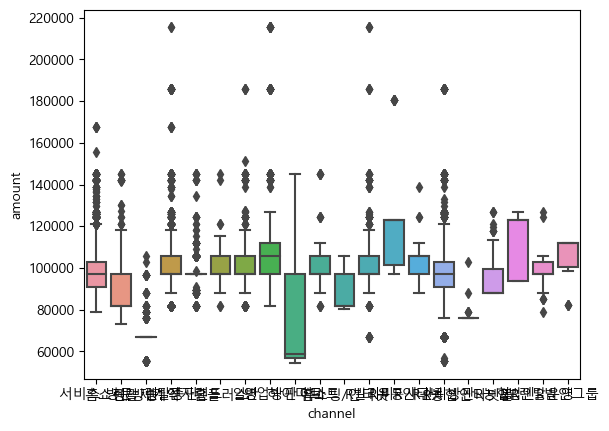

In [35]:
sns.boxplot(data=df_TOCC, x='channel', y='amount')

#### boxplot을 진행하면  
    - 중앙값을 기준으로 boxplot이 그려짐. 
    - 이상치가 많아 보이지만 이게 전부 이상치가 되는것은 아님. 조절이 가능하다. (무슨 소리일까)

<Axes: xlabel='channel', ylabel='amount'>

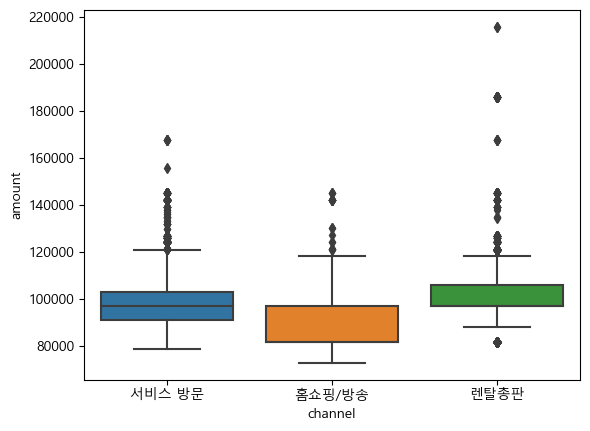

In [36]:
sns.boxplot(data=df_TOCC, x='channel', y='amount', order=df_TOCC_top_list)

#### 홈쇼핑/방송 or 렌탈총판에서 중앙값이 없는 이유는
    - 1Q or 3Q에 겹쳐있기 때문임. 
    - 이게 한쪽으로 쏠려있다는 뜻
    

#### X (설명변수) / Y (목표변수) =연속형 / 연속형
     - Mileage_int/age_int
     - scatterplot을 사용한다. 
     

In [38]:
df_TOCC.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


<Axes: xlabel='Mileage', ylabel='age'>

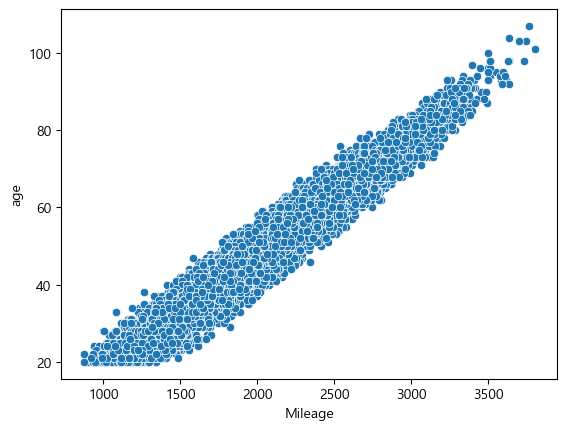

In [39]:
sns.scatterplot(data=df_TOCC, x='Mileage', y='age')

#### 분석
- 1. Mileage가 높을 수록 age가 많다. 
- 2. if, 렌탈마케팅: 수입을 극대화 시키려면? 분포가 많은쪽이다. 
  >이걸 확실히 검증하려면: 연령을 int가 아니라 범주형으로 만들어서 비교한다
    - 25~35 사이 고객 targeting(가설)

<Axes: xlabel='Mileage', ylabel='age'>

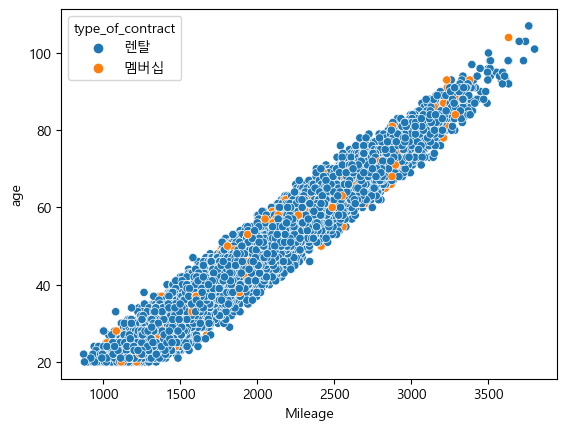

In [40]:
sns.scatterplot(data=df_TOCC, x='Mileage', y='age', hue='type_of_contract')

#### 분석
- 재계약률(멤버십)이 높진 않다.
- 연령대가 40대 후반이 그나마 높다. 
- 재계약율이 높지 않은것으로 보아 서비스 만족도가 좋은편이 아님. 

<Axes: xlabel='Mileage', ylabel='age'>

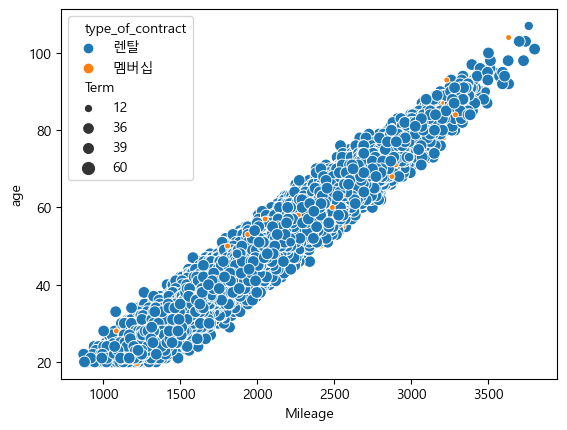

In [41]:
sns.scatterplot(data=df_TOCC, x='Mileage', y='age', hue='type_of_contract', size='Term')

#### 분석
- size: Term = 계약 기간을 할때 
- 신규의 계약기간은 크나 멤버십(재계약율)을 보면 적은 기간만 재계약을 하고 이는 재계약 하한 사람들도 서비스의 만족을 하지 못함을 예상해볼수있다. 

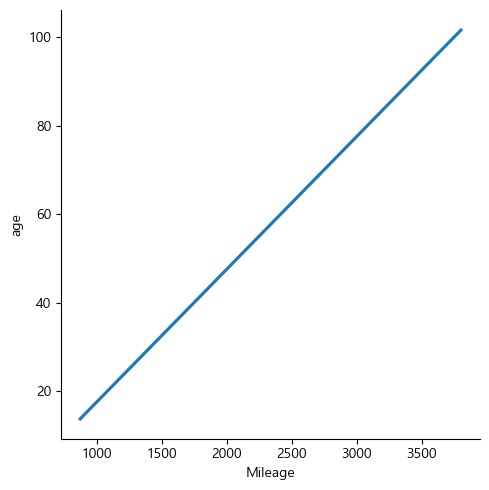

In [43]:
sns.lmplot(data=df_TOCC, x='Mileage', y='age', scatter=False)

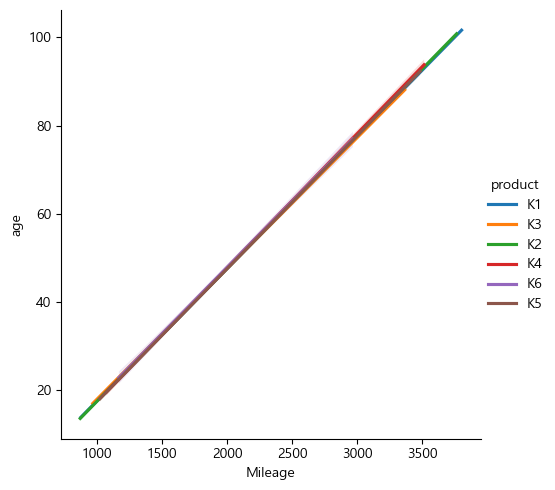

In [45]:
sns.lmplot(data=df_TOCC, x='Mileage', y='age', scatter=False, hue='product')
## 제품별로 쌓이는 mileage별 연령대 분포

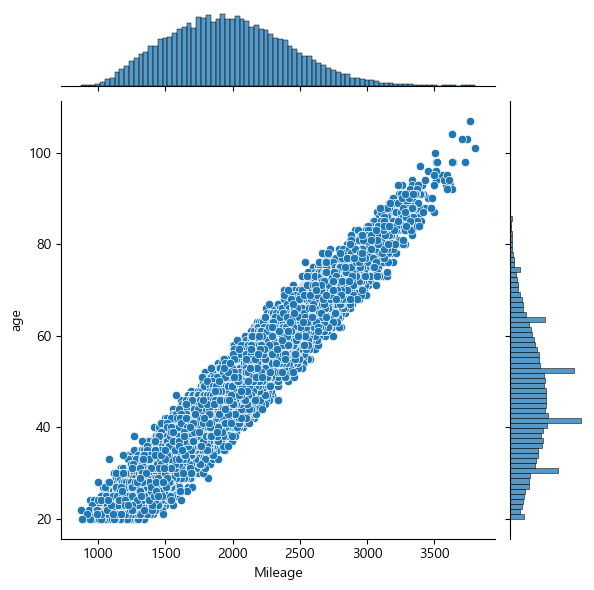

In [46]:
sns.jointplot(data=df_TOCC, x='Mileage', y='age',)

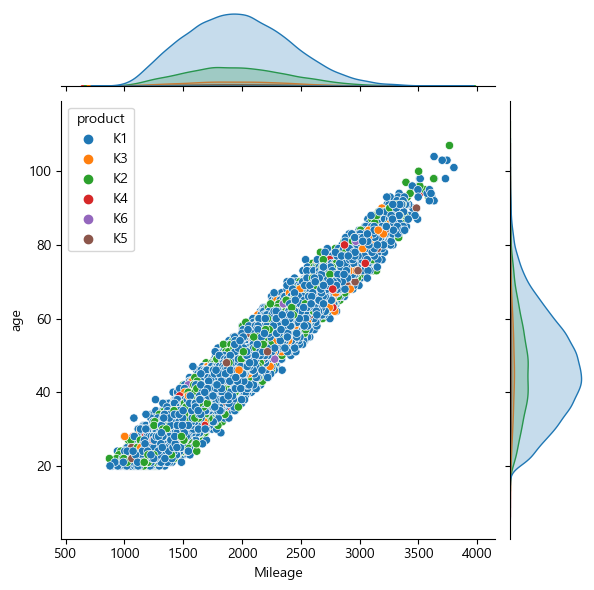

In [47]:
sns.jointplot(data=df_TOCC, x='Mileage', y='age',hue='product')

#### X (설명변수) / Y (목표변수) =연속형 / 연속형
     - 상관관계
        - 사회과학/마케팅 (인간개입) 높지 않음
        - 제조공정/실험실/자연과학 높음
        ⇒ 주로 system이 정해진 공간에서 일어나는 현상은 correlation으로 설명이 가능함

In [49]:
df_TOCC.corr()

C:\Users\01-15\AppData\Local\Temp\ipykernel_7012\195277532.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_TOCC.corr()


,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


In [50]:
df_TOCC.describe().columns

Index(['id', 'Term', 'amount', 'overdue_count', 'credit rating', 'age',
       'Mileage'],
      dtype='object')

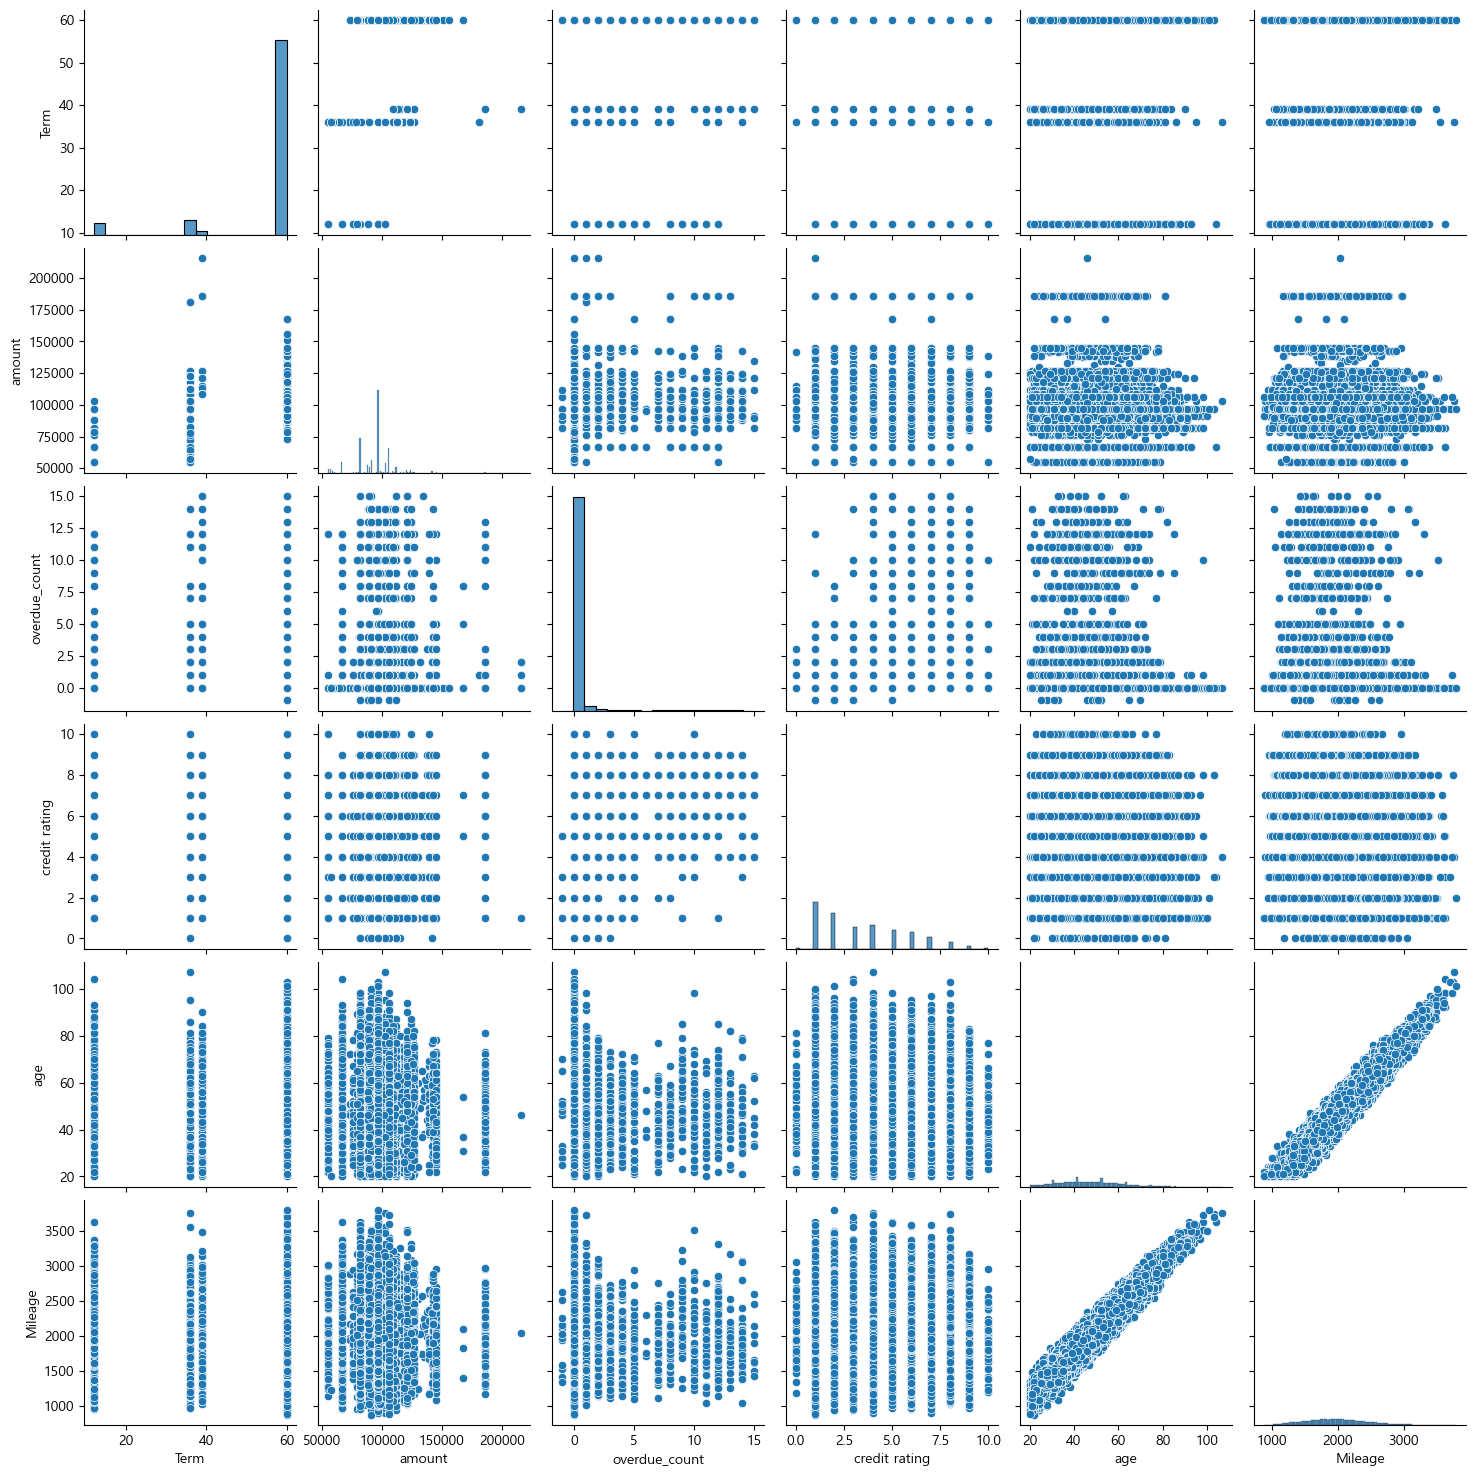

In [51]:
sns.pairplot(df_TOCC[['Term', 'amount', 'overdue_count', 'credit rating', 'age',
       'Mileage']])

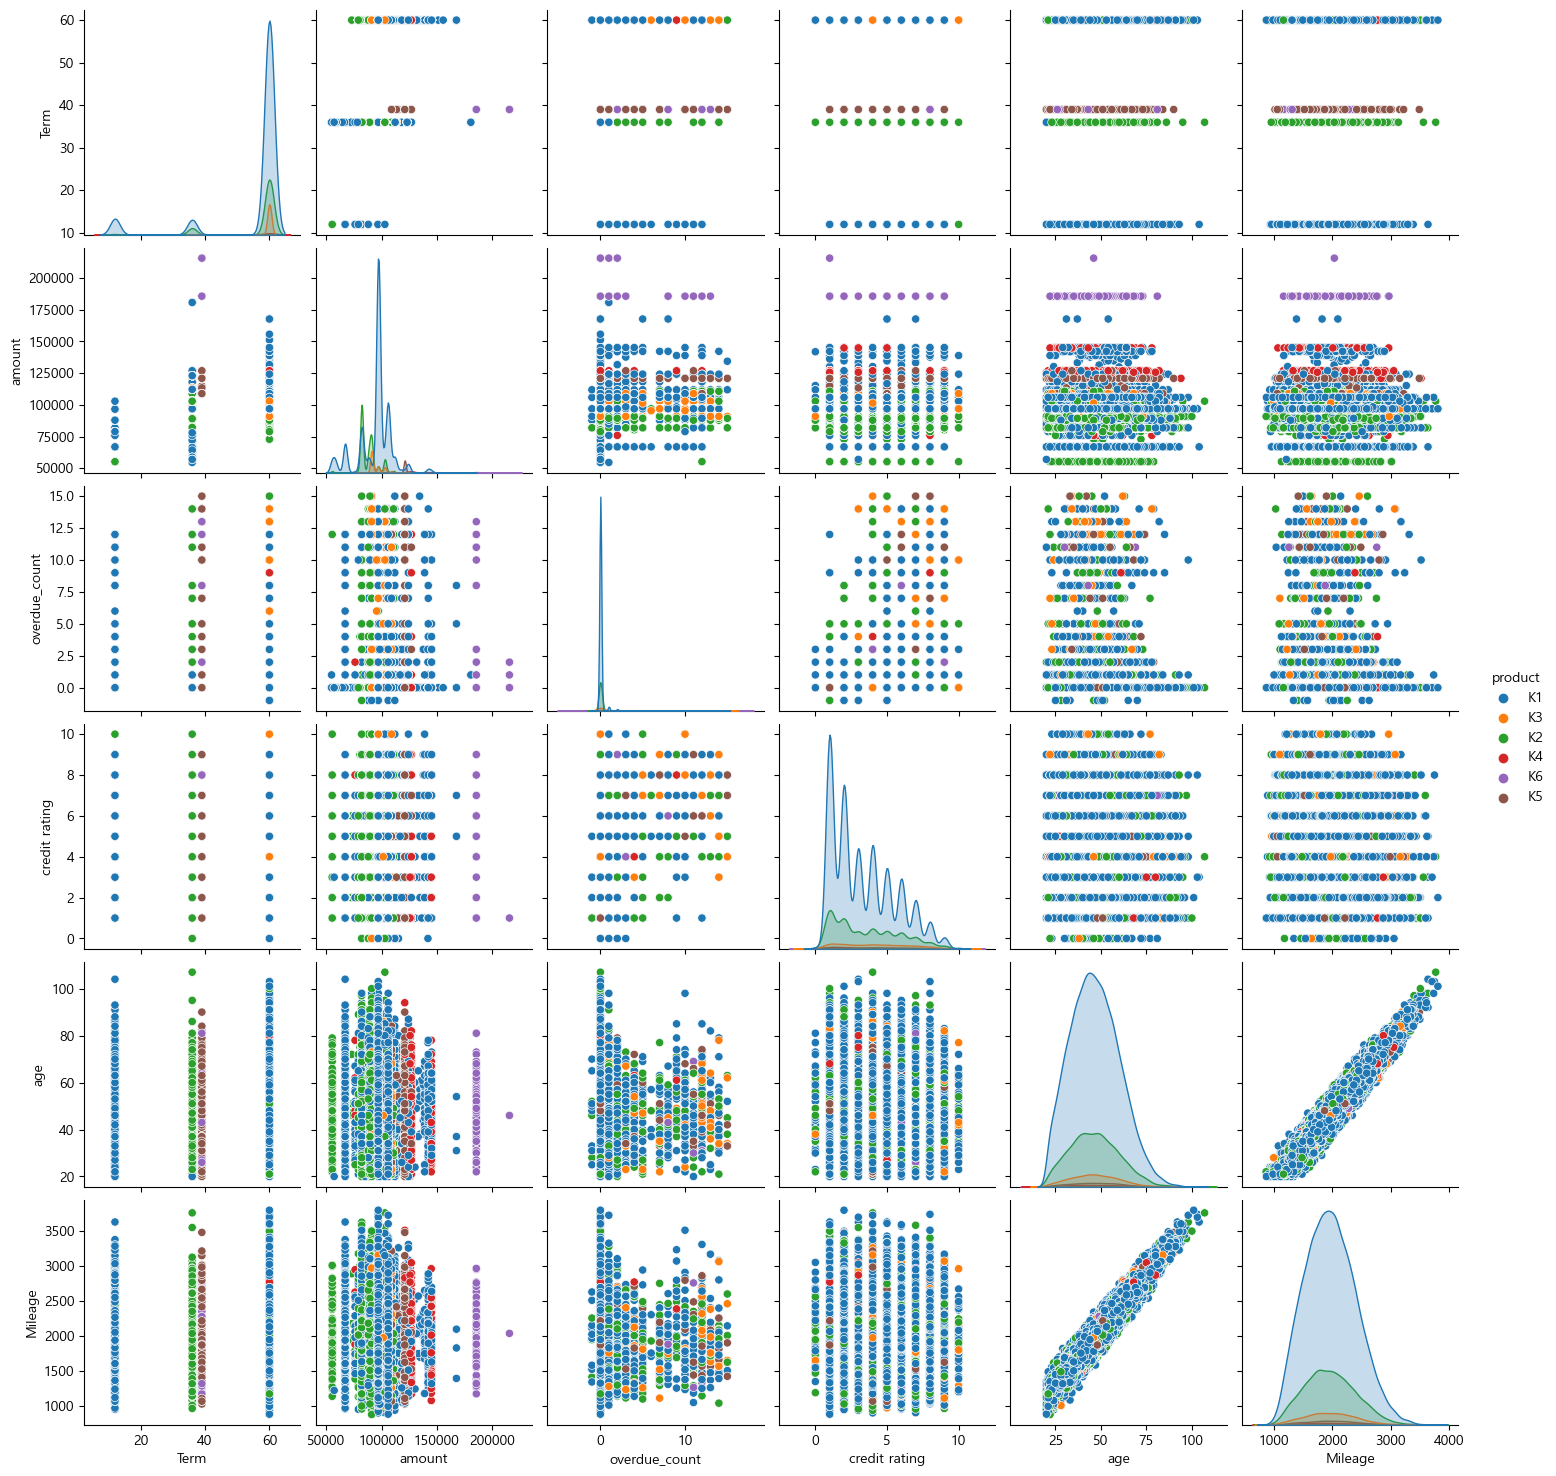

In [52]:
sns.pairplot(df_TOCC[['Term', 'amount', 'overdue_count', 'credit rating', 'age',
       'Mileage','product']], hue='product')

#### X (설명변수)/ Y (목표변수): 연속(순서)형/연속형

In [53]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [65]:
# datetime _날짜는 원래 연속형임. BUT, object 를 연속형으로 바꿔줘야함. 
# 1. column확인: df_TOCC['datetime'] = dtype은 object
# 2. object를 datetime으로 = pd.to_datetime(df_'바꿀column이름')
df_TOCC['datetime(timestamp)'] = pd.to_datetime(df_TOCC['datetime'])
# 결과: dtype = datetime , 이건 클래스임 ⇒ 일, 월, 요일, 등으로 원하는 형식을 뽑을수있음.
df_TOCC['datetime(timestamp)']

0       2019-10-20
1       2019-10-20
2       2019-10-20
3       2019-10-20
4       2019-10-20
           ...    
51299   2020-02-03
51300   2020-02-03
51301   2020-02-03
51302   2020-02-03
51303   2020-02-03
Name: datetime(timestamp), Length: 51304, dtype: datetime64[ns]

<Axes: xlabel='datetime(timestamp)', ylabel='amount'>

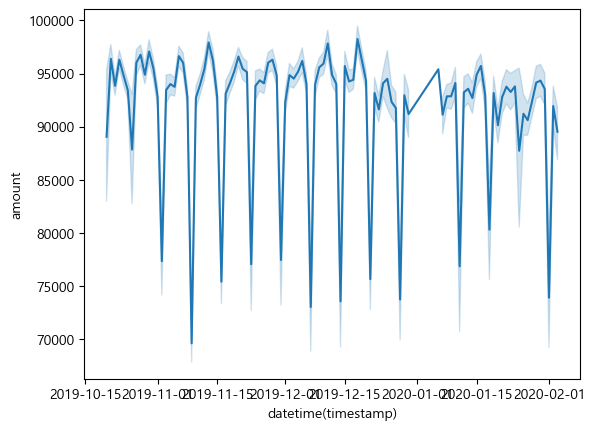

In [66]:
# 평균으로 표현된 그래프
sns.lineplot(df_TOCC, x='datetime(timestamp)', y='amount')


<Axes: xlabel='datetime(timestamp)', ylabel='amount'>

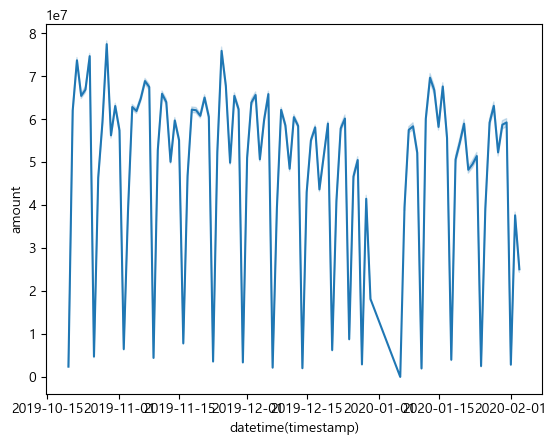

In [67]:
# 총 합 그래프
sns.lineplot(df_TOCC, x='datetime(timestamp)', y='amount', estimator=sum)

<Axes: xlabel='datetime(timestamp)', ylabel='amount'>

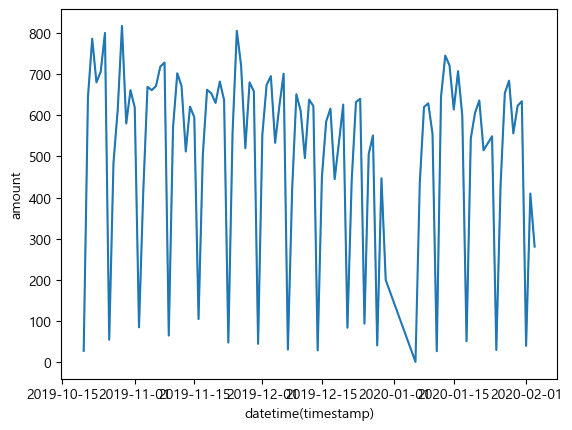

In [68]:
# 건수별
sns.lineplot(df_TOCC, x='datetime(timestamp)', y='amount', estimator=len)

In [70]:
# 주 단위로 보고자 한다면: datetime(timestamp)에서 만들어준다
# .dt.isocalendar().week
df_TOCC['datetime(timestamp)'].dt.isocalendar().week

0        42
1        42
2        42
3        42
4        42
         ..
51299     6
51300     6
51301     6
51302     6
51303     6
Name: week, Length: 51304, dtype: UInt32